In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('dataset_cleaned.csv')

In [3]:
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_name,job_state,same_state,company_age,python,r,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,nm,0,49,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,md,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,fl,1,12,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,wa,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,ny,1,24,1,0,0,0,1


In [4]:
def simple_job(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def job_level(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
df['job_simplified'] = df['Job Title'].apply(simple_job)

In [6]:
df['job_simplified'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simplified, dtype: int64

In [7]:
df['job_level'] = df['Job Title'].apply(job_level)

In [8]:
df['job_level'].value_counts()

na        520
senior    220
jr          2
Name: job_level, dtype: int64

In [9]:
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [10]:
df['job_state'].value_counts()

ca    151
ma    103
ny     72
va     41
il     40
md     35
pa     33
tx     28
nc     21
wa     21
nj     17
fl     16
oh     14
tn     13
dc     11
co     11
ut     10
in     10
wi     10
az      9
mo      9
al      8
mi      6
ga      6
de      6
ky      6
ia      5
ct      5
la      4
ne      4
or      4
nm      3
ks      3
id      2
mn      2
CA      1
ri      1
sc      1
Name: job_state, dtype: int64

In [39]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [11]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [12]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [13]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [14]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [19]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n', ''))

In [20]:
df['Company Name']

0                          Tecolote Research3.8
1      University of Maryland Medical System3.4
2                                    KnowBe44.8
3                                       PNNL3.8
4                         Affinity Solutions2.9
                         ...                   
737                                      GSK3.9
738                               Eventbrite4.4
739           Software Engineering Institute2.6
740                             Numeric, LLC3.2
741             Riverside Research Institute3.6
Name: Company Name, Length: 742, dtype: object

In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'same_state', 'company_age', 'python', 'r',
       'spark', 'aws', 'excel', 'job_simplified', 'job_level', 'num_comp'],
      dtype='object')

<AxesSubplot:>

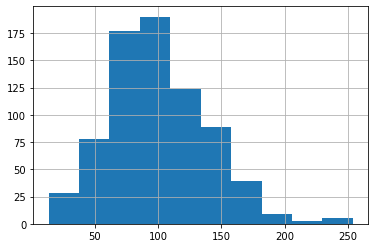

In [26]:
df['avg_salary'].hist()

<AxesSubplot:>

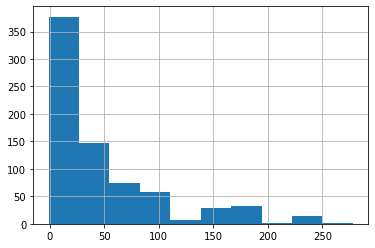

In [31]:
df['company_age'].hist(bins=10)

<AxesSubplot:>

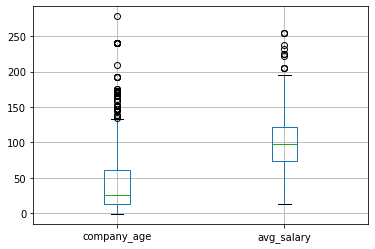

In [35]:
df.boxplot(column=['company_age', 'avg_salary'])

In [38]:
df[['company_age','avg_salary','Rating','num_comp']].corr()

,company_age,avg_salary,Rating,num_comp
company_age,1.000000,0.019492,0.024665,0.128272
avg_salary,0.019492,1.000000,0.013492,0.093813
Rating,0.024665,0.013492,1.000000,0.027190
num_comp,0.128272,0.093813,0.027190,1.000000


<AxesSubplot:>

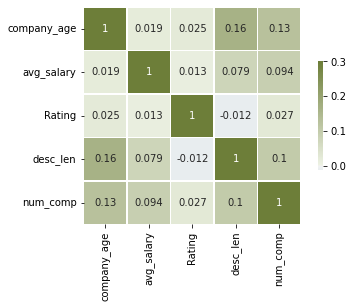

In [42]:
cmap = sns.diverging_palette(220, 100, as_cmap=True)
sns.heatmap(df[['company_age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [44]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_name', 'job_state','same_state', 'python', 'r',
       'spark', 'aws', 'excel', 'job_simplified', 'job_level']]

graph for Location: total = 200


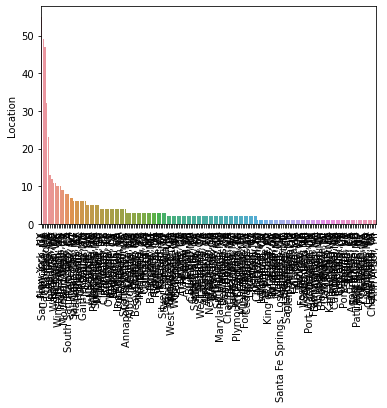

graph for Headquarters: total = 198


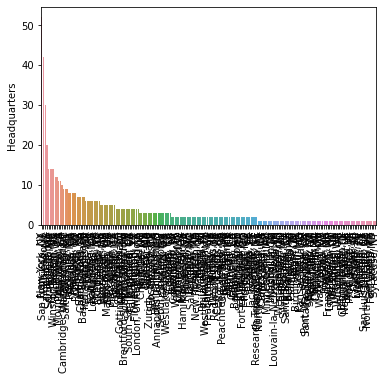

graph for Size: total = 9


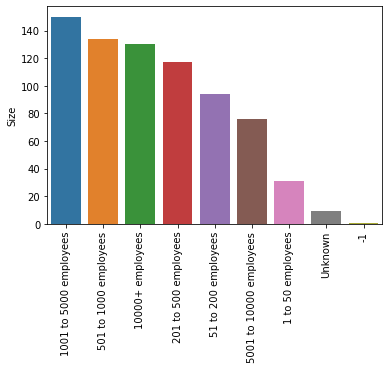

graph for Type of ownership: total = 11


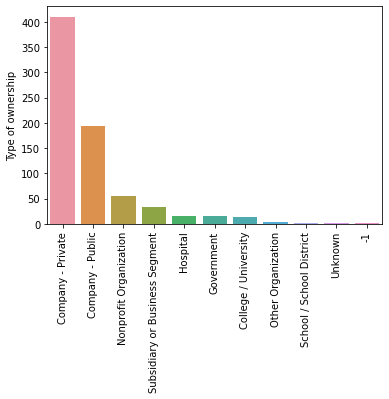

graph for Industry: total = 60


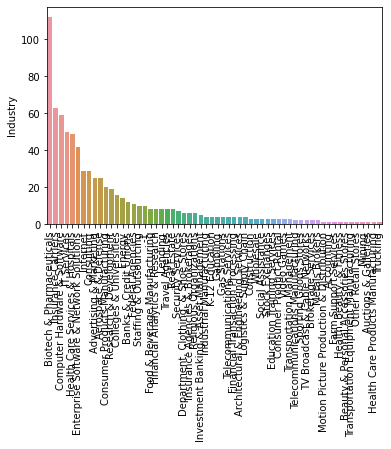

graph for Sector: total = 25


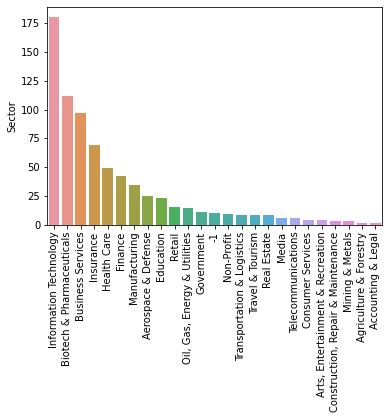

graph for Revenue: total = 14


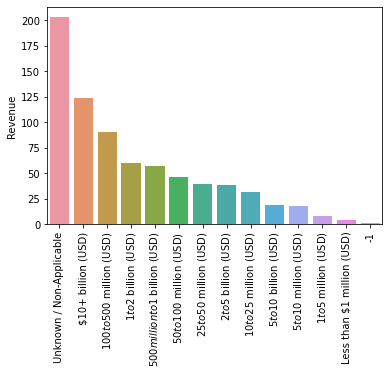

graph for company_name: total = 343


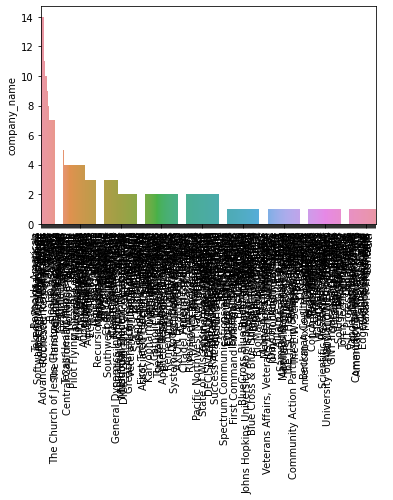

graph for job_state: total = 38


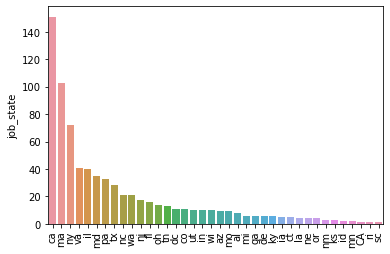

graph for same_state: total = 2


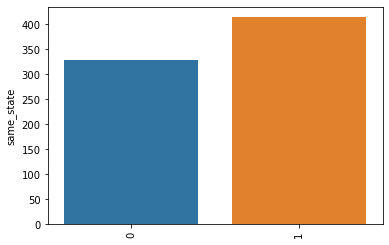

graph for python: total = 2


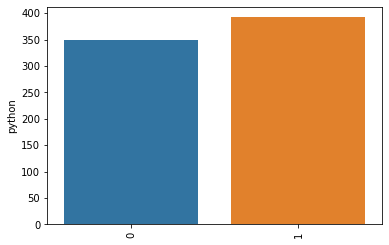

graph for r: total = 2


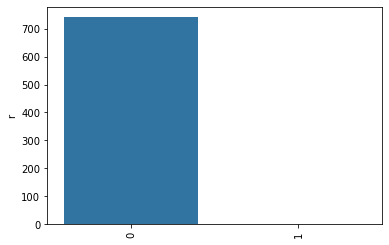

graph for spark: total = 2


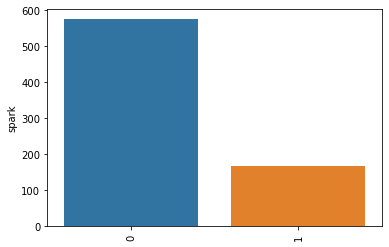

graph for aws: total = 2


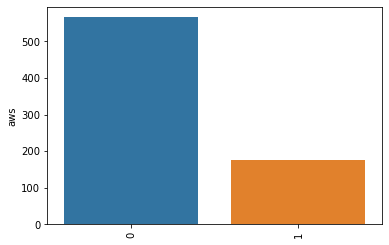

graph for excel: total = 2


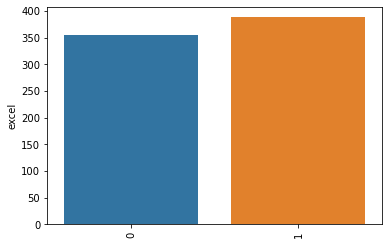

graph for job_simplified: total = 7


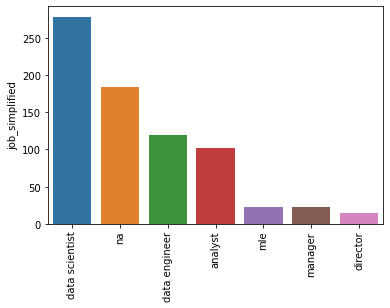

graph for job_level: total = 3


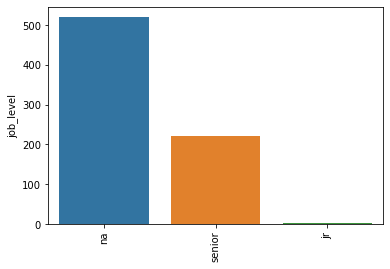

In [46]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


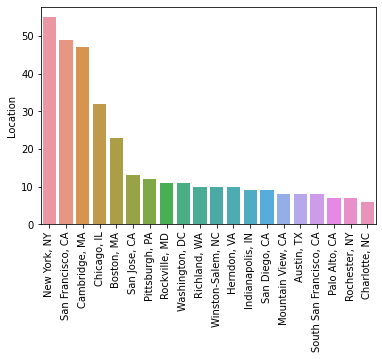

graph for Headquarters: total = 20


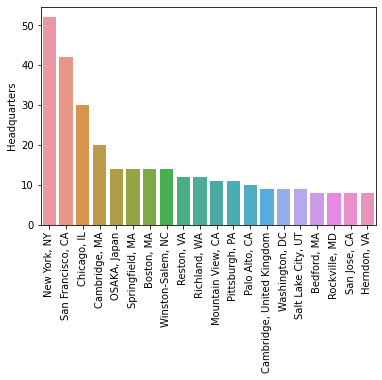

graph for company_name: total = 20


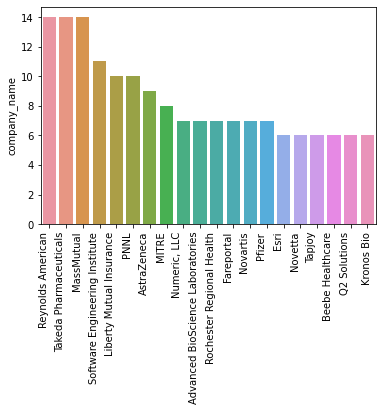

In [47]:
for i in df_cat[['Location','Headquarters','company_name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [49]:
pd.pivot_table(df, index = 'job_simplified', values = 'avg_salary')

,avg_salary
job_simplified,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [50]:
pd.pivot_table(df, index = ['job_simplified','job_level'], values = 'avg_salary')

avg_salary
job_simplified job_level            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [51]:
pd.pivot_table(df, index = ['job_state','job_simplified'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simplified            
wi        na               54.000000
          data scientist  113.500000
          analyst          58.833333
wa        na               97.500000
          data scientist   99.764706
...                              ...
az        na              124.500000
al        data engineer    65.000000
          analyst          62.200000
          na               43.750000
CA        data scientist  107.500000

[115 rows x 1 columns]

In [52]:
pd.pivot_table(df, index = ['job_state','job_simplified'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simplified            
wi        na                       4
          data scientist           3
          analyst                  3
wa        na                       1
          data scientist          17
...                              ...
az        na                       2
al        data engineer            1
          analyst                  5
          na                       2
CA        data scientist           1

[115 rows x 1 columns]

In [54]:
pd.pivot_table(df[df['job_simplified'] == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
dc,149.000000
ca,143.044776
ut,140.500000
mo,127.666667
il,117.233333
nc,117.000000
ny,115.250000
ma,113.750000
wi,113.500000


In [55]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python', 'r', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [56]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [57]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'job_state', 'same_state', 'company_age', 'python', 'r',
       'spark', 'aws', 'excel', 'job_simplified', 'job_level', 'num_comp'],
      dtype='object')